# **Importing the Libraries and Data** #

I imported the needed libraries for this project and then read in the data from a .csv file.

In [19]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in data from CSV file

kpop_boygroups_data = pd.read_csv("kpop_idols_boy_groups.csv", parse_dates=['Debut'])
kpop_boygroups_data.head()

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,100%,NaN,백퍼센트,2012-09-18,TOP Media,4,7,Perfection,Yes
1,14U,NaN,원포유,2017-04-17,BG,14,14,NaN,Yes
2,1the9,NaN,원더나인,2019-02-09,MBK,9,9,NaN,Yes
3,24K,NaN,투포케이,2012-09-06,Choeun,8,6,24U,Yes
4,2AM,NaN,투에이엠,2008-06-21,"JYP, Big Hit",4,4,I Am,No


# **Cleaning the Data** #

I cleaned the data by removing columns of data I did not need for this project using drop() in pandas. Then I create my desired dataframe.

In [20]:
# Clean the data and create desired dataframe for the project

kpop_boygroups_data_df = kpop_boygroups_data.drop(columns=['Name', 'Short', 'Korean Name', 'Fanclub Name'])
kpop_boygroups_data_df.head()

,Debut,Company,Members,Orig. Memb.,Active
0,2012-09-18,TOP Media,4,7,Yes
1,2017-04-17,BG,14,14,Yes
2,2019-02-09,MBK,9,9,Yes
3,2012-09-06,Choeun,8,6,Yes
4,2008-06-21,"JYP, Big Hit",4,4,No


# **Analyzing the Data** #

Below I will explain how I analyzed the data of group structure, debuts, and companies of kpop boy groups.

**Current Members**

I isolated the Members column of the data to analyze the current structure of groups.

In [21]:
# Show the members column only to begin analyzing that section of data

kpop_boygroups_data_df["Members"]

0       4
1      14
2       9
3       8
4       4
       ..
142     4
143    11
144     5
145     4
146     9
Name: Members, Length: 147, dtype: int64

Here I wanted to calculate the maximum number of members in a group currently. Kpop is interesting because while the majority of boybands in the west are often comprised of five members, there are different amounts in a lot of groups. Below you'll see the biggest boy group in kpop has 18 active members. I used the max() function to find the largest group. I named my variable max_members and then printed it to show the result.

In [22]:
# Calculate the maximum number of members current in a group

max_members = kpop_boygroups_data_df["Members"].max()
print(max_members)

18


I also wanted to determine the median number of members in a group by using the median() function in pandas and printing the result of my median_members variable. Interestingly, even though there are large groups with members in the double digits, five still appears to be the sweet spot for kpop groups like it is western boybands. This is especially interesting considering some of the most famous kpop groups like BTS, EXO, Seventeen, NCT, and Super Junior all have more than five members in their groups.

In [23]:
# Calculate the median of the Members column

median_members = kpop_boygroups_data_df["Members"].median()
print(median_members)

5.0


Calculating the minimum numbers of members in a group goes hand in hand with calculating the maximum number of members. I used the pandas min() function and then printed my min_members variable for the result. I was surprised to see that there is at least one "group" with only two members. I went back to the original .csv file to examine the column there and discovered there are actually several groups with only two members and the majority of them are still active.

In [24]:
# Calculate the minimum number of members in a group

min_members = kpop_boygroups_data_df["Members"].min()
print(min_members)

2


I used the pandas function sum() to determine how many men in total are currently working as idols in groups in the kpop industry. After printing the sum_members variable, I was surprised by how large the numner was, but given the number of active groups and the various amount of members each group has, the large number made sense.

In [25]:
# Calculate how many men are currently working in the kpop industry

sum_members = kpop_boygroups_data_df["Members"].sum()
print(sum_members)

873


To go along with the analysis of current members, I wanted to plot out how many groups are currently active compared to those who have disbanded over the years or went on hiatus. I created a list for the group_statuses and group_values. From there I did a for loop for the Active data column with if statements to create the pie chart. I plotted out the chart by using the group_statues list items as my labels and then I exploded the pie chart to emphasize the active piece of the pie. As you can see, this large percentage of groups still being active in the industry explains how so many idols are still active.

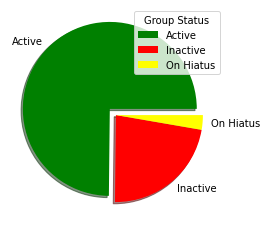

In [26]:
# Plot the current statuses of groups to determine how many are active vs. how many are not or are on hiatus

group_status = ['Active', 'Inactive', 'On Hiatus']
group_values = [0,0,0]
for status in kpop_boygroups_data_df["Active"]:
    if status == "Yes":
        group_values[0] += 1
    if status == "No":
        group_values[1] += 1
    if status == "Hiatus":
        group_values[2] += 1

plt.pie(group_values, labels=group_status, startangle=0, explode=[0.1,0,0], shadow=True, colors=['green', 'red', 'yellow'])

plt.legend(title='Group Status')
plt.show()

**Original Members**

After seven years, kpop groups' contracts are up for renewal. Sometimes, groups will choose to carry on without one or two members because not all of them renewed their contracts with the company. Other times, members are let go from groups due to public scandals or health issues. I wanted to see if there was a dramatic difference between current members and original members.

Here, I isolated the original members column.

In [27]:
# Show the original members column only to begin analyzing that section of data

kpop_boygroups_data_df["Orig. Memb."]

0       7
1      14
2       9
3       6
4       4
       ..
142     4
143    11
144     5
145     5
146     9
Name: Orig. Memb., Length: 147, dtype: int64

From there, I wanted to roughly repeat the same process I did when analyzing the data of the current members. I calculated the maximum amount of members using the max() function again. The same result was printed as it was with current members considering that large group is still active in the industry.

In [28]:
# Calculate the most amount of original members in a group

max_original = kpop_boygroups_data_df["Orig. Memb."].max()
print(max_original)

18


I also calculated the median again using the median(). This time I got a median of 6, which wasn't all that surprising to me based on my knowledge of kpop. It's not at all uncommon for groups to lose a member after contract renewals and that appears to be represented here in the calculation. 

In [29]:
# Calculate the median amount of original members in a group

median_original = kpop_boygroups_data_df["Orig. Memb."].median()
print(median_original)

6.0


The minimum amount of original members was calculated using the min() function and I got the same result as current members again after printing. That shows that those groups with only two members did not all get that number due to losing members; at least one group was originally structured as a duo.

In [30]:
# Calculate the minimum amount of original members in a group

min_original = kpop_boygroups_data_df["Orig. Memb."].min()
print(min_original)

2


**Debuts**

Along with member structure, I wanted to analyze the debuts of kpop groups.

The first thing I did was isolate the Debut data column.

In [31]:
# Show the debut column only to analyze that data

kpop_boygroups_data_df["Debut"]

0     2012-09-18
1     2017-04-17
2     2019-02-09
3     2012-09-06
4     2008-06-21
         ...    
142   2016-06-12
143   2017-08-07
144   2019-05-27
145   2014-08-12
146   2010-01-07
Name: Debut, Length: 147, dtype: datetime64[ns]

I chose to calculate the median of debuts with the median() function because I wanted to see what the mid point of kpop as a genre is at this point in time. It resulted in a date of May 26, 2015. That falls right in the middle the third generation of kpop. For reference, we are currently in the fourth generation of the genre.

In [32]:
# Calculate median debut date of a group

median_debut = kpop_boygroups_data_df["Debut"].median()
print(median_debut)

2015-05-26 00:00:00


I also wanted to find the most frequent debut dates. I assumed there were instances where more than one group debuted on a single date and that ended up being true for multiple dates. I was interested in calculating this aspect because I had my own theories on what generation the majority of groups likely debuted. I hypothesized that the majority of groups debuted in the third generation of kpop that lasted from rougly 2012-2020, although there are still arguments within the fandom about that ending date. As you can see, aside from the 2009 date, the others were 2014, 2015, and 2016. This showed that my instincts were largely correct. My reasoning for that was due to the continuation of the Korean Wave that began with the second generation with a group like EXO being created to partially target the Chinese market as well as the international, especially US, success of BTS.

In [33]:
# Calculate most frequent debut dates for groups

mode_debut = kpop_boygroups_data_df["Debut"].mode()
print(mode_debut)

0   2009-10-14
1   2014-07-09
2   2015-05-20
3   2016-02-23
Name: Debut, dtype: datetime64[ns]


**Companies**

Finally, I analyzed the Company data. As usual, I began by isolating the data.

In [34]:
# Pull out the company data column

kpop_boygroups_data_df["Company"]

0         TOP Media
1                BG
2               MBK
3            Choeun
4      JYP, Big Hit
           ...     
142             RBW
143             YMC
144           Choon
145              YG
146     Star Empire
Name: Company, Length: 147, dtype: object

First, I wanted to calculate which company debuted the most groups. Again, I used the mode function to do this. I got SM as the result. SM Entertainment is the oldest kpop entertainment company so this result made sense. They're the home of some of the most famous boy groups such as EXO, SHINee, Super Junior, and TVXQ.

In [35]:
# Calculate the company who has debuted the most groups

mode_company = kpop_boygroups_data_df["Company"].mode()
print(mode_company)

0    SM
Name: Company, dtype: object


While SM Entertainment is the oldest company, two others are not far behind in age. YG Entertainment and JYP Entertainment have been around since the 1990s just like SM. Together, these three groups make up what is known in the fandom as the Big 3 (although since the rise of popularity of BTS, some are pushing for a new term because their company, while fairly new, is becoming quite large). As it stands, these are the companies who have likely produced the largest numbers of groups over the years because of the lifespan and financial stability.

I also knew SM debuted the most groups, but I wanted to plot a bar graph to show a comparison between that company and the other two Big 3 companies. To do that, I created a dictionary and then a for loop with if statements. After that, I plotted my bar graph with the bars representing each company. I found that JYP debuted the second largest number of groups with YG coming in third. This definitely falls in line with many fandom inside jokes regarding the slowness of YG Entertainment in their groups' activities.

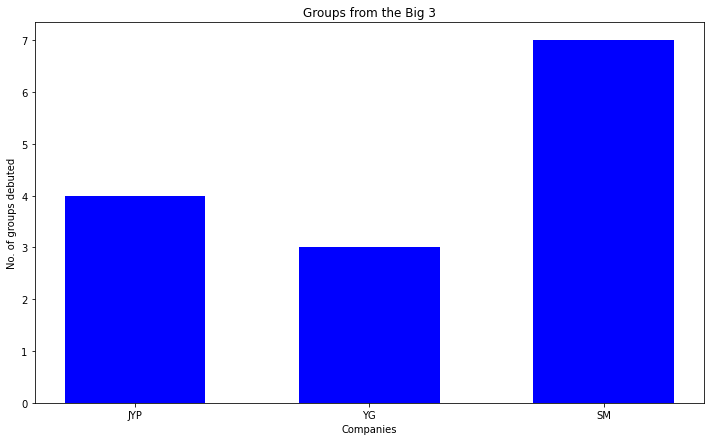

In [36]:
# Plot how many groups have debuted under one of the Big 3 companies

counts = {'JYP': 0, 'YG': 0, 'SM': 0}
for company in kpop_boygroups_data_df["Company"]:
    if company == 'JYP':
        counts['JYP'] += 1
    if company == 'YG':
        counts['YG'] += 1
    if company == 'SM':
        counts['SM'] += 1
companies = list(counts.keys())
values = list(counts.values())

fig = plt.figure(figsize = (12, 7))

#Create the bar graph for the visualization

plt.bar(companies, values, color = 'blue', width = 0.6)

plt.xlabel("Companies")
plt.ylabel("No. of groups debuted")
plt.title("Groups from the Big 3")
plt.show()

**Final Thoughts**

I was happy to see that some of the assumptions I've made as a fan are actually correct based off of this data. It was informative and very interesting as a fan to be able to analyze these numbers and it's inspired me to dig deeper into other hypotheses I have regarding the genre and fandom surrounding it. Thanks!